# V.1 Exploring the green reds
<br>

## **a) Plotting a scatter plot matrix of all red wine data variables, excluding quality.**
<br>

**Function "plot_scatter_matrix" was called with good_threshold == 8, bad_threshold == 3.**
<br>

**Obviously, can change threshold values.**

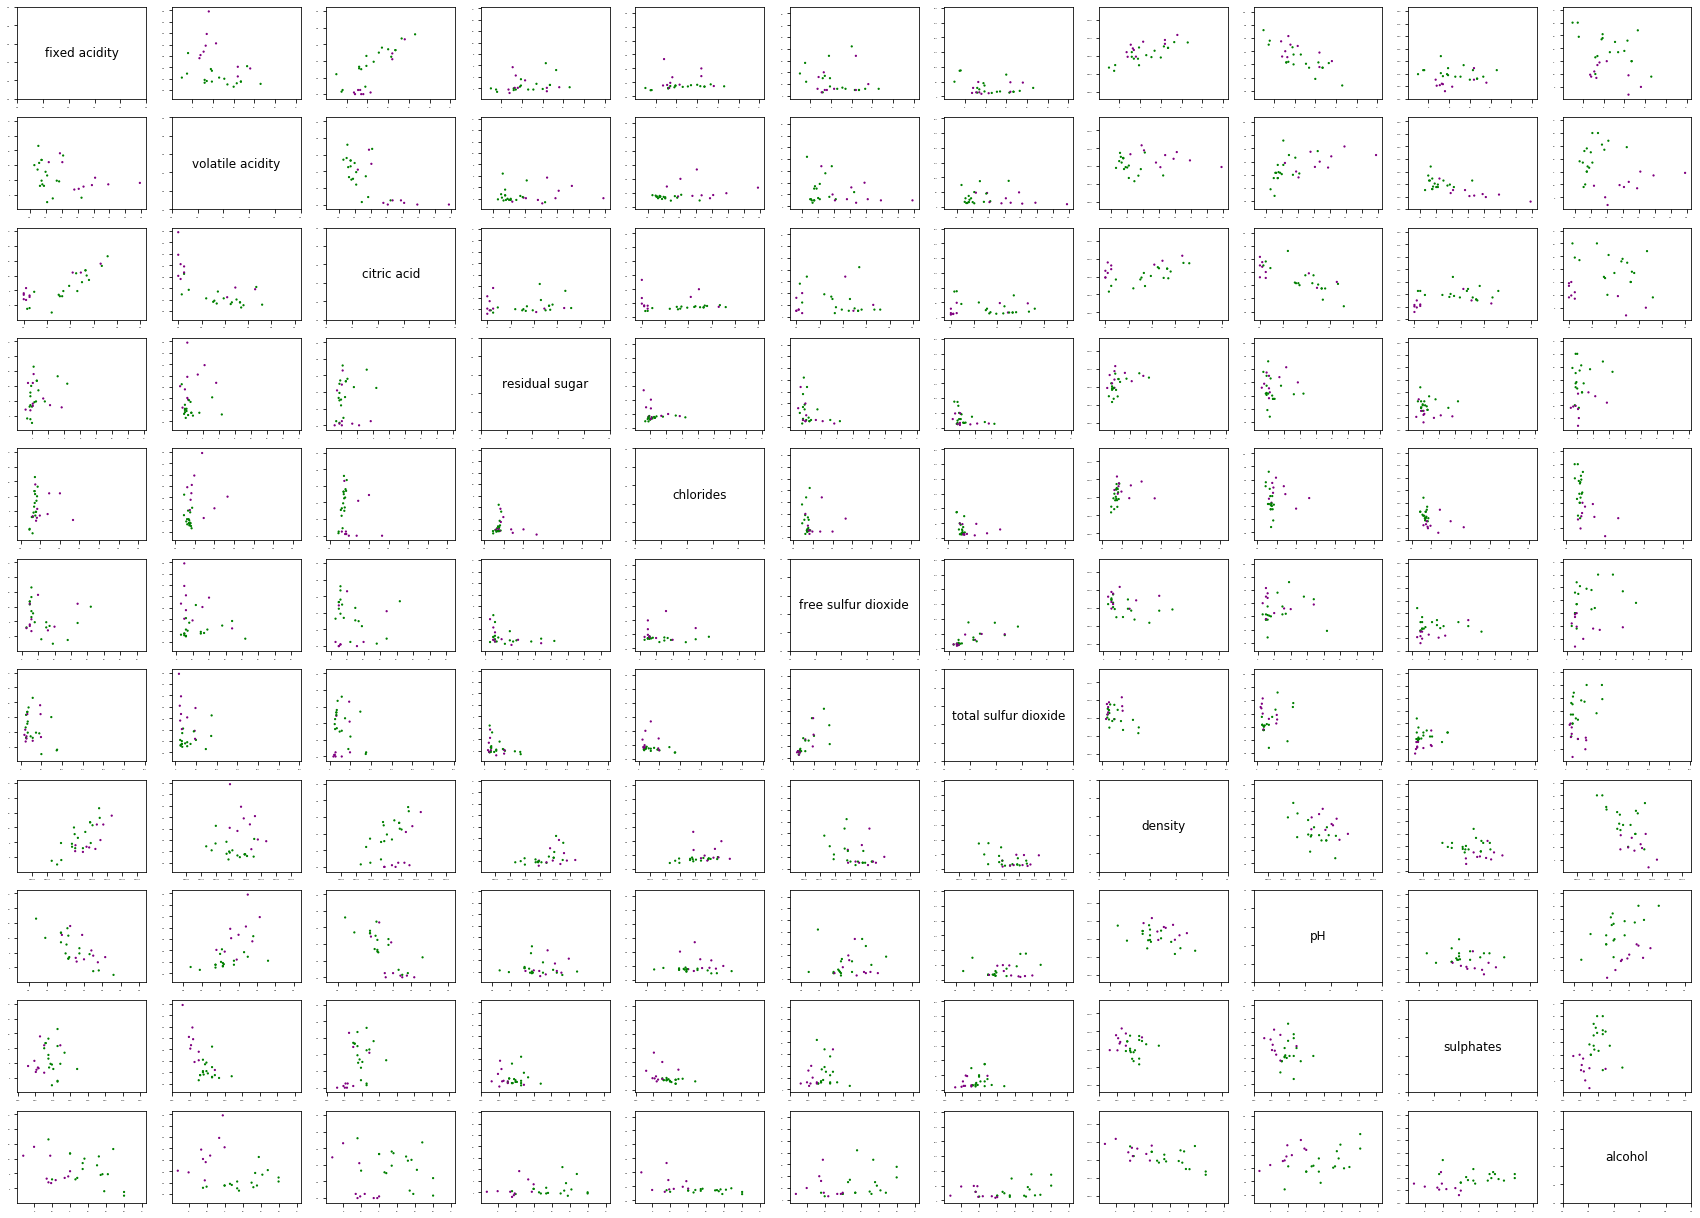

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("winequality-red.csv", delimiter = ';')

def plot_scatter_matrix(wine_data, good_threshold, bad_threshold, save_plot=False):
    params = list(data)
    param_amt = len(params) - 1

    plt.rc('xtick', labelsize=2)
    plt.rc('ytick', labelsize=2)
    
    fig, plot = plt.subplots(param_amt, param_amt, figsize=(30, 22))
    for i in range(param_amt):
        for j in range(param_amt):
            if i == j:
                plot[i, i].text(0.5, 0.5, params[i], fontsize=12, ha='center', va='center')
            else:
                colors = ['green' if qlty >= good_threshold else 'purple' for qlty in data['quality']]
                size = [1.5 if qlty >= good_threshold else 1.5 if qlty <= bad_threshold else 0 for qlty in data['quality']]
                plot[i, j].scatter(data[params[i]], data[params[j]], s=size, c=colors)

    if save_plot:
        plt.savefig('scatter_matrix.png')

    plt.show()


plot_scatter_matrix(data, 8, 3, True)

### **b) Analyzing chemical factor variations in data to determine optimal choices to start Machine Learning process**
<br>

**The Perceptron works well with linearly separable data.  In other words, you can draw a line that separates the green points from the purple, and the two are completely divided.**
<br>

**Based on the scatter matrix above, there is a clear division in the pH vs alcohol, and citric acid vs density graphs.  For now, we will focus on pH vs alcohol content.**

# V.2 Learning to perceptron
<br>

## **a) Implementing a perceptron with the following traits/properties/functionalities:**
- **Randomly initialized weights and bias**
- **Implements the Rosenblatt perceptron learning rule**
- **Uses the Heaviside Step Acitvation Function (discrete version)**

**To filter out the data, we will create a function called "add_qlty_column" to modify the Pandas DataFrame (DF) for our Red Wine.**
<br>

**The table has been printed out for reference.  Notice that the DF only contains the alcohol and pH numbers, and its associative quality rating.**

In [5]:
def add_qlty_column(wine_data, good_threshold, bad_threshold):
    new_data = data.assign(Good=[1 if qlty >= good_threshold else 0 if qlty <= bad_threshold else -1 for qlty in data['quality']])
    
    threshold_filter = (new_data['quality'] >= good_threshold) | (new_data['quality'] <= bad_threshold)
    data_with_quality = new_data[threshold_filter]
    return data_with_quality

updated_data = add_qlty_column(data, 8, 3)
print(updated_data[['alcohol', 'pH', 'quality', 'Good']])

      alcohol    pH  quality  Good
267     12.80  3.35        8     1
278     12.60  3.23        8     1
390     12.90  3.56        8     1
440      9.80  2.88        8     1
455     13.40  3.22        8     1
459      9.00  3.25        3     0
481     11.70  3.15        8     1
495     11.00  3.15        8     1
498     11.00  3.15        8     1
517      8.40  3.16        3     0
588     14.00  3.72        8     1
690     10.70  3.63        3     0
828     12.70  3.46        8     1
832      9.90  3.38        3     0
899     11.00  3.48        3     0
1061    12.50  3.21        8     1
1090    11.80  2.98        8     1
1120    13.10  3.20        8     1
1202    11.70  3.35        8     1
1269    14.00  3.50        8     1
1299    10.90  3.50        3     0
1374     9.80  3.32        3     0
1403    10.00  3.23        8     1
1449    11.30  3.23        8     1
1469     9.70  3.31        3     0
1478    10.20  3.40        3     0
1505     9.95  3.55        3     0
1549    11.40  3.24 

**The Perceptron has been created as a class, since we can define properties and methods as a single object.**
<br>

**a) The random module has been imported to support random initialization of weights and bias.**
<br>

**b) The "rosenblatt_learning" method performs Task A.  The Rosenblatt Learning Rule executes until the specified iteration value (or epoch) is reached.  For each epoch, we calculate the difference between our expected Quality and the weighted sum using the pH, alcohol variables, our weights, and bias.**
<br>

**c) The amount of errors (after passing our weighted sum to the Heaviside Step Activation Function) is tracked through each epoch.  If it is 0, our program exits out of our loop.**

In [6]:
import random

class Perceptron():
    def __init__(self, data, learning_rate):
        self.data = data
        self.learning_rate = learning_rate

    def heaviside_step_activation(self, activation):
        return 1 if activation >= 0 else 0

    def predict(self, params):
        weighted_sum = 0
        for i in range(len(self.weights)):
            weighted_sum += self.weights[i] * params[i]
        weighted_sum += self.bias
        return self.heaviside_step_activation(weighted_sum)
        
    def rosenblatt_learning(self):
        self.bias = random.random()
        self.weights = [random.random() for params in range(len(list(self.data)))]
        
        for itr in range(15000):
            errors = 0
            for x, y_true in zip(self.data.values, self.data['Good']):
                error = y_true - self.predict(x)
                if error != 0:
                    self.weights += error * x * learning_rate
                    self.bias += error * learning_rate
                    errors += 1
            if errors == 0:
                break

## b) Implement a function to train the Perceptron
<br>

**The function should take in the Red Wine Data as a parameter, and have the following:**
<br>

- **Specify the number of epochs**
- **Train perceptron until errors == 0, if the epochs is set to 0**
- **Specify the learning rate**
- **Return a list of python tuples that represents the Perceptron's performance -->**
<br>

**\[(current_epoch, num_errors_at_epoch_end, [array_of_weights], bias), . . . \]**
<br>
<br>

### **Altering our Perceptron declaration above, we end up with the following "finalized" version**

In [7]:
"""Function for Perceptron.  Loops forever"""
def infinity():
    index = 0
    while 1:
        yield index
        index += 1

class Perceptron():
    def __init__(self, data, learning_rate, epochs):
        self.data = data
        """Learning Rate is already specified from previous Perceptron class declaration"""
        self.learning_rate = learning_rate
        """Specified epochs as parameter for Perceptron class"""
        self.epochs = epochs
        """Performance is initialized as empty list, to be populated by learning method"""
        self.performance = []
        
    def heaviside_step_activation(self, activation):
        return 1 if activation >= 0 else 0

    def predict(self, params):
        weighted_sum = 0
        for i in range(len(self.weights)):
            weighted_sum += self.weights[i] * params[i]
        weighted_sum += self.bias
        return self.heaviside_step_activation(weighted_sum)
        
    def rosenblatt_learning(self, y_cmp):
        """Set a seed for the random module, to prevent 'lucky' weights and biases"""
        random.seed(9000)
        self.bias = random.random()
        self.weights = [random.random() for params in range(len(list(self.data)))]
        
        """Utilizes the 'infinity' function above if epochs == 0, else loop until provided epoch is reached"""
        for itr in infinity() if self.epochs == 0 else range(self.epochs):
            errors = 0
            for x, y_true in zip(self.data.values, y_cmp):
                error = y_true - self.predict(x)
                if error != 0:
                    """Learning rate is specified"""
                    self.weights += error * x * self.learning_rate
                    self.bias += error * self.learning_rate
                    errors += 1
            """Tuple for tracking performance"""
            self.performance.append((itr, errors, list(self.weights), self.bias))
            if errors == 0:
                break
        return self.performance

### **Training our Perceptron, with a learning rate = 0.9, and setting epoch = 0, using our updated_data variable from above...**

In [8]:
red_wine_perceptron = Perceptron(updated_data[['pH', 'alcohol']], 0.9, 0)
perceptron_training = red_wine_perceptron.rosenblatt_learning(updated_data['Good'])
print(perceptron_training)

[(0, 13, [-2.5905504853133943, 3.5414176942412787], -0.5560377751597642), (1, 13, [-5.920550485313392, 5.971417694241277], -1.4560377751597642), (2, 11, [-9.232550485313393, 6.871417694241275], -2.356037775159764), (3, 11, [-12.544550485313394, 7.771417694241274], -3.2560377751597644), (4, 11, [-15.946550485313391, 7.681417694241272], -4.156037775159764), (5, 9, [-19.00655048531339, 6.511417694241272], -5.056037775159765), (6, 6, [-19.63655048531339, 8.131417694241271], -5.056037775159765), (7, 13, [-22.96655048531339, 10.56141769424127], -5.956037775159765), (8, 7, [-25.89155048531339, 8.67141769424127], -6.856037775159765), (9, 2, [-25.96355048531339, 8.94141769424127], -6.856037775159765), (10, 4, [-26.44955048531339, 9.48141769424127], -6.856037775159765), (11, 6, [-26.99855048531339, 11.551417694241268], -6.856037775159765), (12, 7, [-29.923550485313392, 9.661417694241266], -7.756037775159766), (13, 2, [-29.99555048531339, 9.931417694241265], -7.756037775159766), (14, 2, [-30.0675

## c) Plot - Classification Errors vs Epoch &&  pH vs alcohol
<br>


**Focusing on using wines with a score/quality >= 8 && quality <= 3, pH vs alcohol, create two plots**
<br>

**The number of errors for each epoch should be plotted.  The decision boundary for pH vs alcohol should also appear alongside the previous plot, with two highlighted regions.**

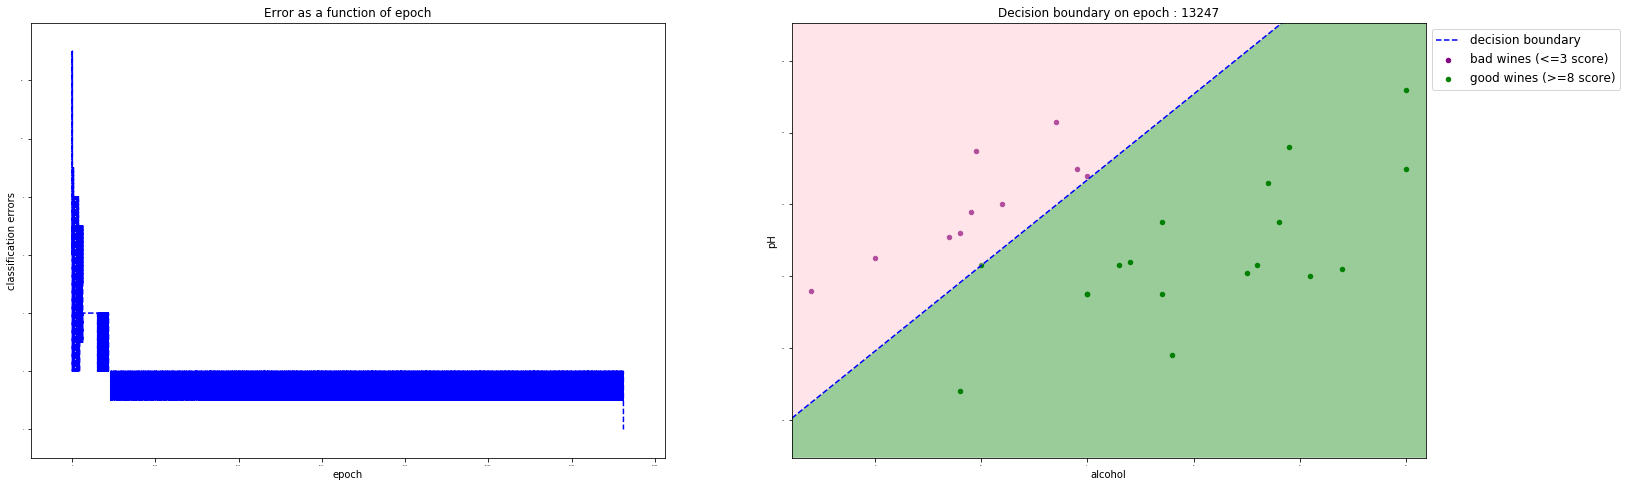

In [9]:
"""Returns the min, max for the x_axis, y_axis of our wine_data - in this case, alcohol and pH respectively"""
"""Function 'x_y_bounds' takes the x_axis, and y_axis wine_data array of values"""
"""Returns a tuple - see return line"""
def x_y_bounds(x_axis, y_axis, wine_data):
    x_data = [x_val for x_val in wine_data[x_axis]]
    y_data = [y_val for y_val in wine_data[y_axis]]
    x_min, x_max = min(x_data), max(x_data)
    y_min, y_max = min(y_data), max(y_data)
    return (([x_min, x_max], [y_min, y_max]))

"""Function 'setup_plot' is a helper function to decrease repetitiveness of main function below"""
"""Sets title, x_label, and y_label, returning this modified plot"""
def setup_plot(plot, title, x_label, y_label):
    plot.set_title(title)
    plot.set_xlabel(x_label)
    plot.set_ylabel(y_label)
    return plot

"""Function 'plot_performance' takes in tuple from Perceptron learning function"""
"""wine_data parameter - contains x_axis, y_axis, and quality column"""
"""good_thresh, bad_thresh parameter - represents data of interest from quality column"""
"""epoch parameter - Default -1 value to plot until epoch specified in Perceptron model, else only until
specified epoch"""
def plot_performance(performance, wine_data, good_thresh, bad_thresh, epoch=-1, save_plot=False):
    
    """Get performance data from a specific epoch"""
    def extract(index):
        return [itr[index] for itr in performance]

    
    """Derived point slope equation for plotting decision boundary"""
    def y_val_decision_boundary(x, weight1, weight2, bias):
        return (-weight1 / weight2) * x + (-bias / weight2)

    
    """Declare variables within this function to represent our collected data"""
    """Also include ones for plot title, x and y axis labels"""
    x_axis, y_axis, compare = 'alcohol', 'pH', 'quality'
    epo_vs_error_title = 'Error as a function of epoch'
    e_vs_e_x_title, e_vs_e_y_title = 'epoch', 'classification errors'
    decision_boundary_title = 'Decision boundary on epoch'
    epochs, errors, weights, bias = extract(0), extract(1), extract(2), extract(3)
    epoch_choice = epoch if (epoch > 0 and epoch < len(performance)) else len(performance)

    
    """Setup first plot - Classification Error vs Epoch"""
    fig, plot = plt.subplots(1, 2, figsize=(25, 8))
    plt.rc('xtick', labelsize=10)
    plt.rc('ytick', labelsize=10)
    epoch_vs_error = setup_plot(plot[0], epo_vs_error_title, e_vs_e_x_title, e_vs_e_y_title)
    x_param_vs_y_param = setup_plot(plot[1], decision_boundary_title + " : " + str(epoch_choice), x_axis, y_axis)
    
    
    """Set x_axis and y_axis limits dynamically by finding their max values, and multiplying by percentage"""
    epoch_buffer, errors_buffer = max(epochs) * 0.075, max(errors) * 0.075
    plot[0].set(xlim=(min(epochs) - epoch_buffer, max(epochs) + epoch_buffer), ylim=(min(errors) - errors_buffer, max(errors) + errors_buffer))
    plot[0].plot(epochs[:epoch_choice], errors[:epoch_choice], 'b--')

    
    """Create variables to keep track of weights, and bias"""
    b = bias[epoch_choice - 1]
    weight1 = weights[epoch_choice - 1][0]
    weight2 = weights[epoch_choice - 1][1]

    
    """Separate bad wine and good wine into their own datasets"""
    bad_wine = (wine_data[wine_data[compare] <= bad_thresh])[[x_axis, y_axis]]
    good_wine = (wine_data[wine_data[compare] >= good_thresh])[[x_axis, y_axis]]
    
    
    """Set the x_axis, y_axis boundaries"""
    """Calls 'x_y_bounds' function from above to determine those limits"""
    axis_bounds = x_y_bounds(x_axis, y_axis, wine_data)
    x_decision_boundary = [i for i in range(-20, 20)]
    y_decision_boundary = [y_val_decision_boundary(i, weight2, weight1, b) for i in range(-20, 20)]
    
    
    """Add additional buffers - extend limit on x_axis, y_axis"""
    axis_buffer = 0.05 * min(axis_bounds[0][1], axis_bounds[1][1])
    plot[1].set(xlim=(axis_bounds[0][0] - axis_buffer, axis_bounds[0][1] + axis_buffer), ylim=(axis_bounds[1][0] - axis_buffer, axis_bounds[1][1] + axis_buffer))
    decision_boundary = plot[1].plot(x_decision_boundary, y_decision_boundary, 'b--')
    
    
    """Plot the bad and good wine with two separate calls to scatter"""
    bad_wine_plot = plot[1].scatter(bad_wine[x_axis], bad_wine[y_axis], s=20, c='purple')
    good_wine_plot = plot[1].scatter(good_wine[x_axis], good_wine[y_axis], s=20, c='green')
    
    
    """Use fill_between method to color two regions based on decision boundary"""
    plot[1].fill_between(x_decision_boundary, axis_bounds[1][0] - axis_buffer, y_decision_boundary, facecolor='green', alpha=0.4)
    plot[1].fill_between(x_decision_boundary, axis_bounds[1][1] + axis_buffer, y_decision_boundary, facecolor='pink', alpha=0.4)

    
    """Create legend on right of second plot"""
    plot[1].legend(['decision boundary' , 'bad wines (<=' + str(bad_thresh) + ' score)', 'good wines (>=' + str(good_thresh) + ' score)'], loc='upper left', bbox_to_anchor=(1,1), prop={'size':12})
    
    
    """Choice to save plot, if last parameter of plot_performance function is == True"""
    if save_plot == True:
        plt.savefig("perceptron_plot_performance.png")

    plt.show()

plot_performance(perceptron_training, updated_data, 8, 3, 15000, True)

## d) Feature Scaling - Modifications to Data for Faster Convergence
<br>

**Our data takes around 13,000 epochs to converge, even with a learning rate of 0.9 (max 1.0).**
<br>

**To reach our decision boundary faster, we can normalize our data to lie within a certain range**
<br>

**There are multiple different statistical methods to achieve this, such as standardization**
<br>

**For our data, we will use mean normalization**

       alcohol        pH  quality  Good
267   0.262436  0.042942        8     1
278   0.226722 -0.099915        8     1
390   0.280293  0.292942        8     1
440  -0.273278 -0.516582        8     1
455   0.369579 -0.111820        8     1
459  -0.416135 -0.076105        3     0
481   0.066008 -0.195153        8     1
495  -0.058992 -0.195153        8     1
498  -0.058992 -0.195153        8     1
517  -0.523278 -0.183248        3     0
588   0.476722  0.483418        8     1
690  -0.112564  0.376276        3     0
828   0.244579  0.173895        8     1
832  -0.255421  0.078656        3     0
899  -0.058992  0.197704        3     0
1061  0.208865 -0.123724        8     1
1090  0.083865 -0.397534        8     1
1120  0.316008 -0.135629        8     1
1202  0.066008  0.042942        8     1
1269  0.476722  0.221514        8     1
1299 -0.076849  0.221514        3     0
1374 -0.273278  0.007228        3     0
1403 -0.237564 -0.099915        8     1
1449 -0.005421 -0.099915        8     1


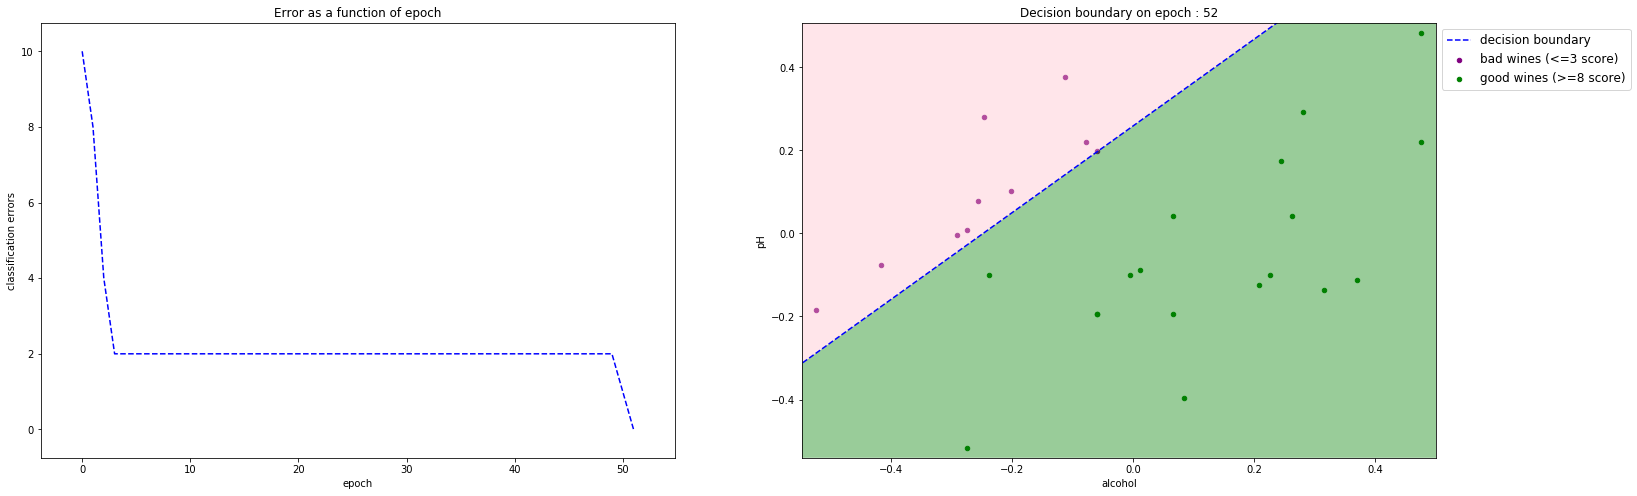

In [10]:
def average(data):
    return sum(data) / len(data)

def mean_normalization(num, data, average):
    return (num - average) / (max(data.values) - min(data.values))

def with_feature_scaling(updated_data):
    x_axis, y_axis = 'alcohol', 'pH'

    graph_data = updated_data[[x_axis, y_axis, 'quality', 'Good']]

    x_axis_avg = average(updated_data[x_axis].values)
    y_axis_avg = average(updated_data[y_axis].values)
    
    x_norm = [mean_normalization(x, graph_data[x_axis], x_axis_avg) for x in graph_data[x_axis]]
    graph_data = graph_data.assign(alcohol = x_norm)
    
    y_norm = [mean_normalization(y, graph_data[y_axis], y_axis_avg) for y in graph_data[y_axis]]
    graph_data = graph_data.assign(pH = y_norm)

    return graph_data

normalized_data = with_feature_scaling(updated_data)
print(normalized_data[['alcohol', 'pH', 'quality', 'Good']])

red_wine_perceptron = Perceptron(normalized_data[['pH', 'alcohol']], 0.9, 0)
perceptron_training = red_wine_perceptron.rosenblatt_learning(normalized_data['Good'])
plot_performance(perceptron_training, normalized_data, 8, 3, 15000, True)

**The mean normalized data allows the Perceptron to converge to 0 errors after approximately 50 epochs.**
<br>

**To keep our models consistent, the Perceptron is trained with a learning rate of 0.9.** 

# V.3 My fair ADALINE

## a) Training our Perceptron with a larger range of Quality

**A single perceptron can converge on a decision boundary, if our data is linearly separable.**
<br>

**By setting our quality threshold to cover a wider range of data, specifically wines with a score of 4, and with a score of 7 and higher, the perceptron cannot correctly train.**
<br>

**Our data points for these values overlap, making a separable linear boundary not possible.**

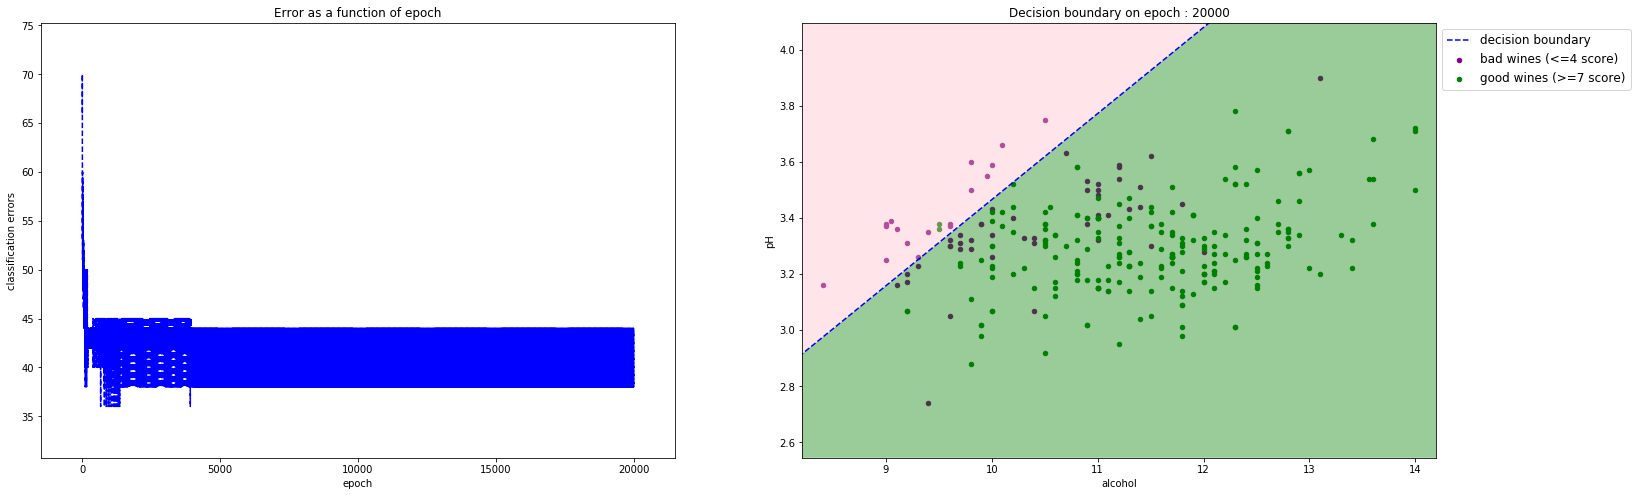

In [12]:
updated_data = add_qlty_column(data, 7, 4)

red_wine_perceptron = Perceptron(updated_data[['pH', 'alcohol']], 0.9, 20000)
perceptron_training = red_wine_perceptron.rosenblatt_learning(updated_data['Good'])
plot_performance(perceptron_training, updated_data, 7, 4, 20000, True)


**Even after 20,000 epochs, the Perceptron does not find an optimal solution for the decision boundary.**
<br>

**After the first several 10 epochs, the decision boundary oscillates between 35 and 45 classification errors.**
<br>

**At this point, we should find a better model to handle this larger dataset.**


## b) Creating an ADAptive LInear NEuron (ADALINE).  The initial setup.

**The ADALINE model is based on minimizing the error across all values in a dataset.**

**Using either batch or online learning, and a process called gradient descent, we can reach the optimal decision boundary.**

**With a high level of accuracy, we can classify good and bad wine.**
<br>
<br>

**To start off, the ADALINE is different from its Perceptron counterpart in the activation function used.**

**Depending on the dataset, we can use a non-linear activation function.  For now, we will focus on the identity function (returns the same value as the weighted sum).**

**As the quantizer, we will use the Heaviside Step Activation function. (returns 1 if >= 0, else -1).**
<br>
<br>

**In addition to creating our ADALINE, we should also create functions that will perform matrix/vector calculations.  This includes matrix vector multiplication, and other scalar by vector operations.**

In [13]:
def vector_op(v1, v2, op):
    ops = {
        "+" : lambda x, y : x + y,
        "-" : lambda x, y : x - y,
        "*" : lambda x, y : x * y,
        "/" : lambda x, y : x / y
    }
    return [ops[op](num1,num2) for num1, num2 in zip(v1, v2)]

def dot_product(matrix, vector):
    sums = []
    for rows in matrix:
        weighted_sum = 0
        for i in range(len(vector)):
            weighted_sum += rows[i] * vectors[i]
        sums.append(weighted_sum)
    return sums
        
class Adaline():
    def __init__(self, data):
        self.data = data

    def linear_activation(self, activation):
        return activation

    def net_input(self, params):
        bias_vector = [self.bias] * len(params)
        return vector_op(dot_product(params, self.weights), bias_vector, "+")

    def widrow_hoff_learning(self, cmp_data):
        random.seed(9000)
        self.costs = []
        self.bias = random.random()
        self.weights = [random.random() for params in range(len(list(self.data)) - 1)]

        for i in range(100):
            output = [self.linear_activation(samples) for samples in self.net_input(self.data.values)]
            errors = vector_subtract(cmp_data.values, output)
            self.weights += dot_product(self.data.values, errors)
            self.bias += sum(errors)

    def predict():
        return [1 if result >= 0 else -1 for result in self.net_input(self.data.values)]